In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from scipy.stats import norm, skew


import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '[:,3f]'.format(x))
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,"[:,3f]",8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,"[:,3f]",9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,"[:,3f]",11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,"[:,3f]",9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,"[:,3f]",14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_ID = train['Id']
test_ID  = test['Id']

train.drop('Id', axis = 1, inplace = True)
test.drop('Id',  axis = 1, inplace = True)

In [5]:
y_train = train.SalePrice.values 

In [6]:
ntrain = train.shape[0]
ntest  = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [7]:
missin_val_count_by_column = (all_data.isnull().sum())
print(missin_val_count_by_column[missin_val_count_by_column > 0][:10])

MSZoning          4
LotFrontage     486
Alley          2721
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType     1766
MasVnrArea       23
BsmtQual         81
BsmtCond         82
dtype: int64


In [8]:
cols_with_missing  = [col for col  in all_data.columns 
                                         if all_data[col].isnull().any()]
all_data  = all_data.drop(cols_with_missing, axis = 1)

In [9]:
print(all_data['LotShape'].unique())

['Reg' 'IR1' 'IR2' 'IR3']


In [10]:
all_data = pd.get_dummies(all_data)

In [11]:
all_data[['LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3']].head()

,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [12]:
train = all_data[:ntrain]
test =  all_data[ntrain:]

In [13]:
def rmse(y, y_pred):
    return  np.sqrt(mean_squared_error(y, y_pred))

In [14]:
from sklearn.linear_model import  LinearRegression
model_linear = LinearRegression()

In [15]:
model_linear.fit(train, y_train);

In [16]:
y_pred = model_linear.predict(train)
score = rmse(y_train, y_pred)
print('Score: {}'.format(score))

Score: 25845.008171476267


In [17]:
prediction = model_linear.predict(test)

In [18]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = prediction 
sub.to_csv('basic_submission.csv', index = False)

In [19]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [20]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

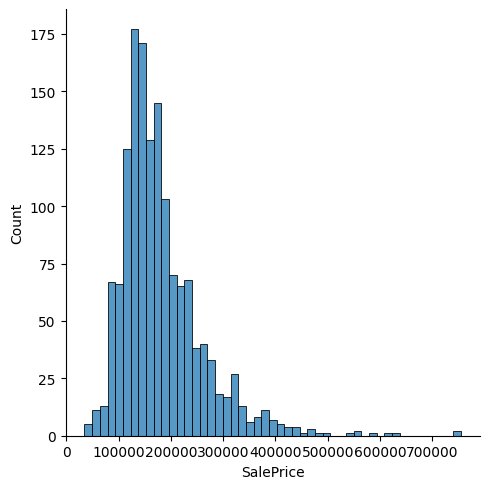

In [21]:
sns.displot(train['SalePrice']);

In [22]:
print('Skewness : {}'.format(train['SalePrice'].skew()))
print('Kurtosis : {}'.format(train['SalePrice'].kurt()))

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


Text(0, 0.5, 'SalePrice')

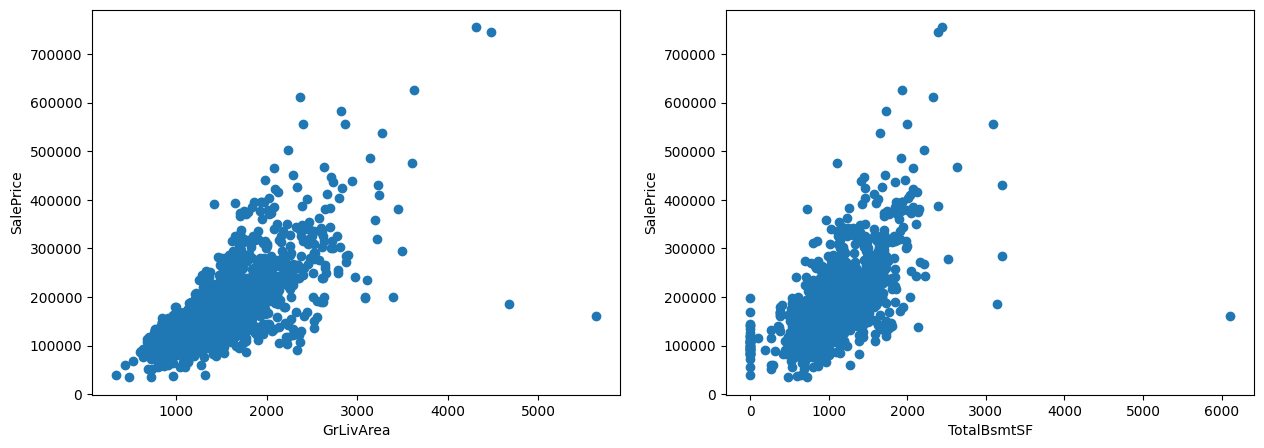

In [23]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(train['GrLivArea'], train['SalePrice'])
ax[0].set_xlabel('GrLivArea')
ax[0].set_ylabel('SalePrice')

ax[1].scatter(train['TotalBsmtSF'], train['SalePrice'])
ax[1].set_xlabel('TotalBsmtSF')
ax[1].set_ylabel('SalePrice')

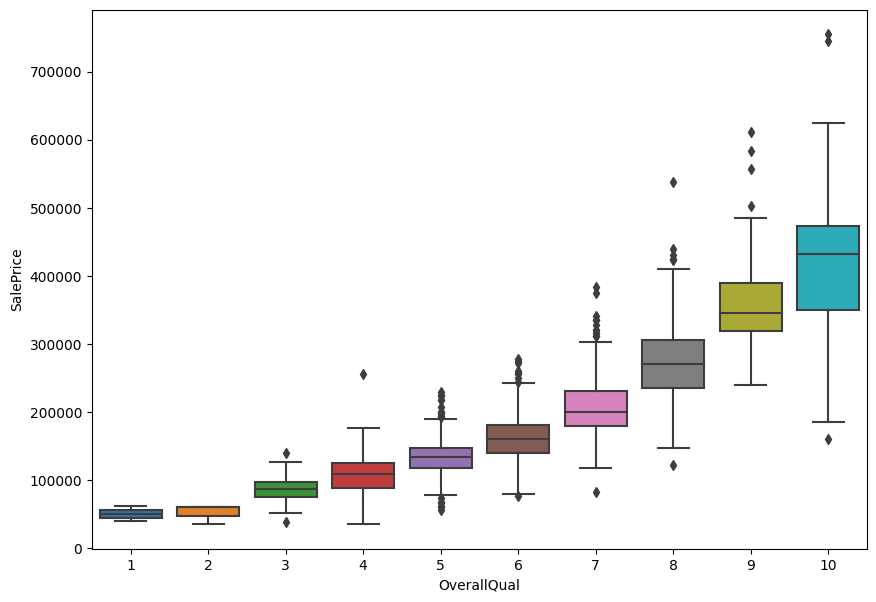

In [24]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize = (10,7))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)

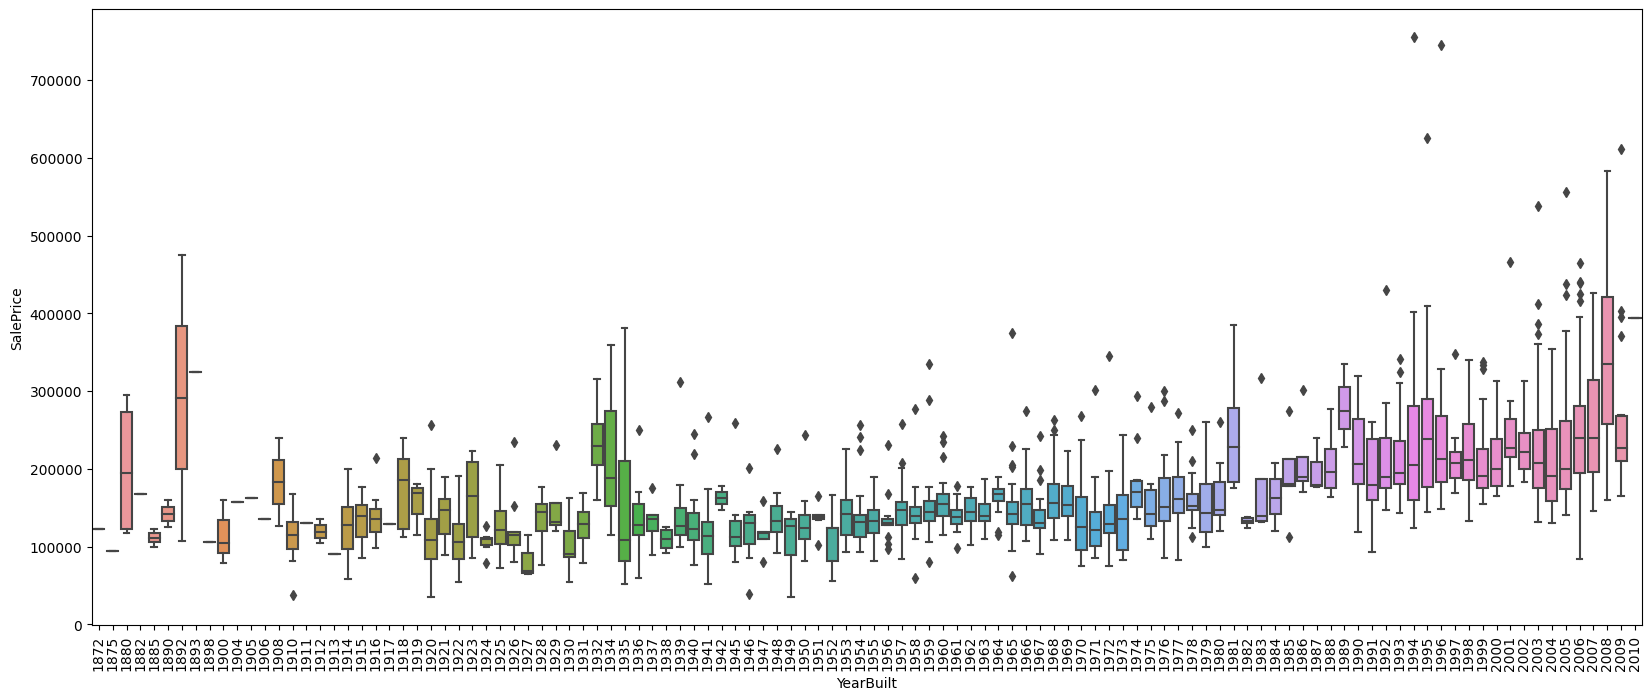

In [25]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (20,8))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)
plt.xticks(rotation = 90);

In [26]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [28]:
corrmat = train.select_dtypes(include=[np.number]).corr()

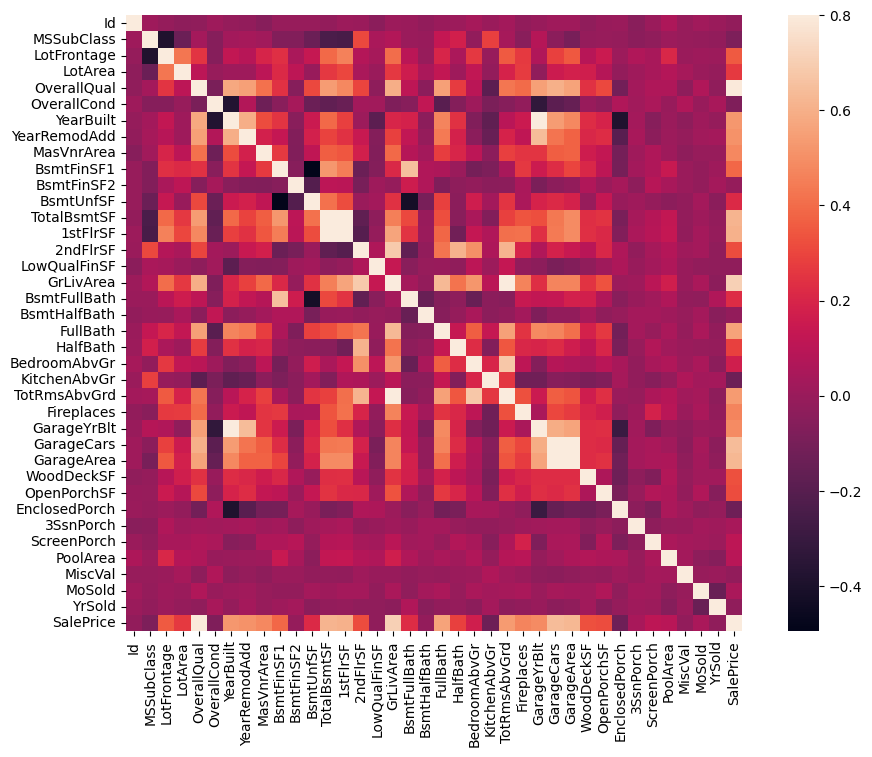

In [29]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [30]:
corrmat.sort_values(by=['SalePrice'], ascending=False)[['SalePrice']][:10]

,SalePrice
SalePrice,"[:,3f]"
OverallQual,"[:,3f]"
GrLivArea,"[:,3f]"
GarageCars,"[:,3f]"
GarageArea,"[:,3f]"
TotalBsmtSF,"[:,3f]"
1stFlrSF,"[:,3f]"
FullBath,"[:,3f]"
TotRmsAbvGrd,"[:,3f]"
YearBuilt,"[:,3f]"


In [31]:
top_10_correlations = corrmat.sort_values(by=['SalePrice'], ascending=False)[['SalePrice']][:10]
correlation_values = top_10_correlations.values.flatten().tolist()
print(correlation_values)

[1.0, 0.7909816005838053, 0.7086244776126515, 0.6404091972583519, 0.6234314389183622, 0.6135805515591943, 0.6058521846919153, 0.5606637627484453, 0.5337231555820284, 0.5228973328794967]


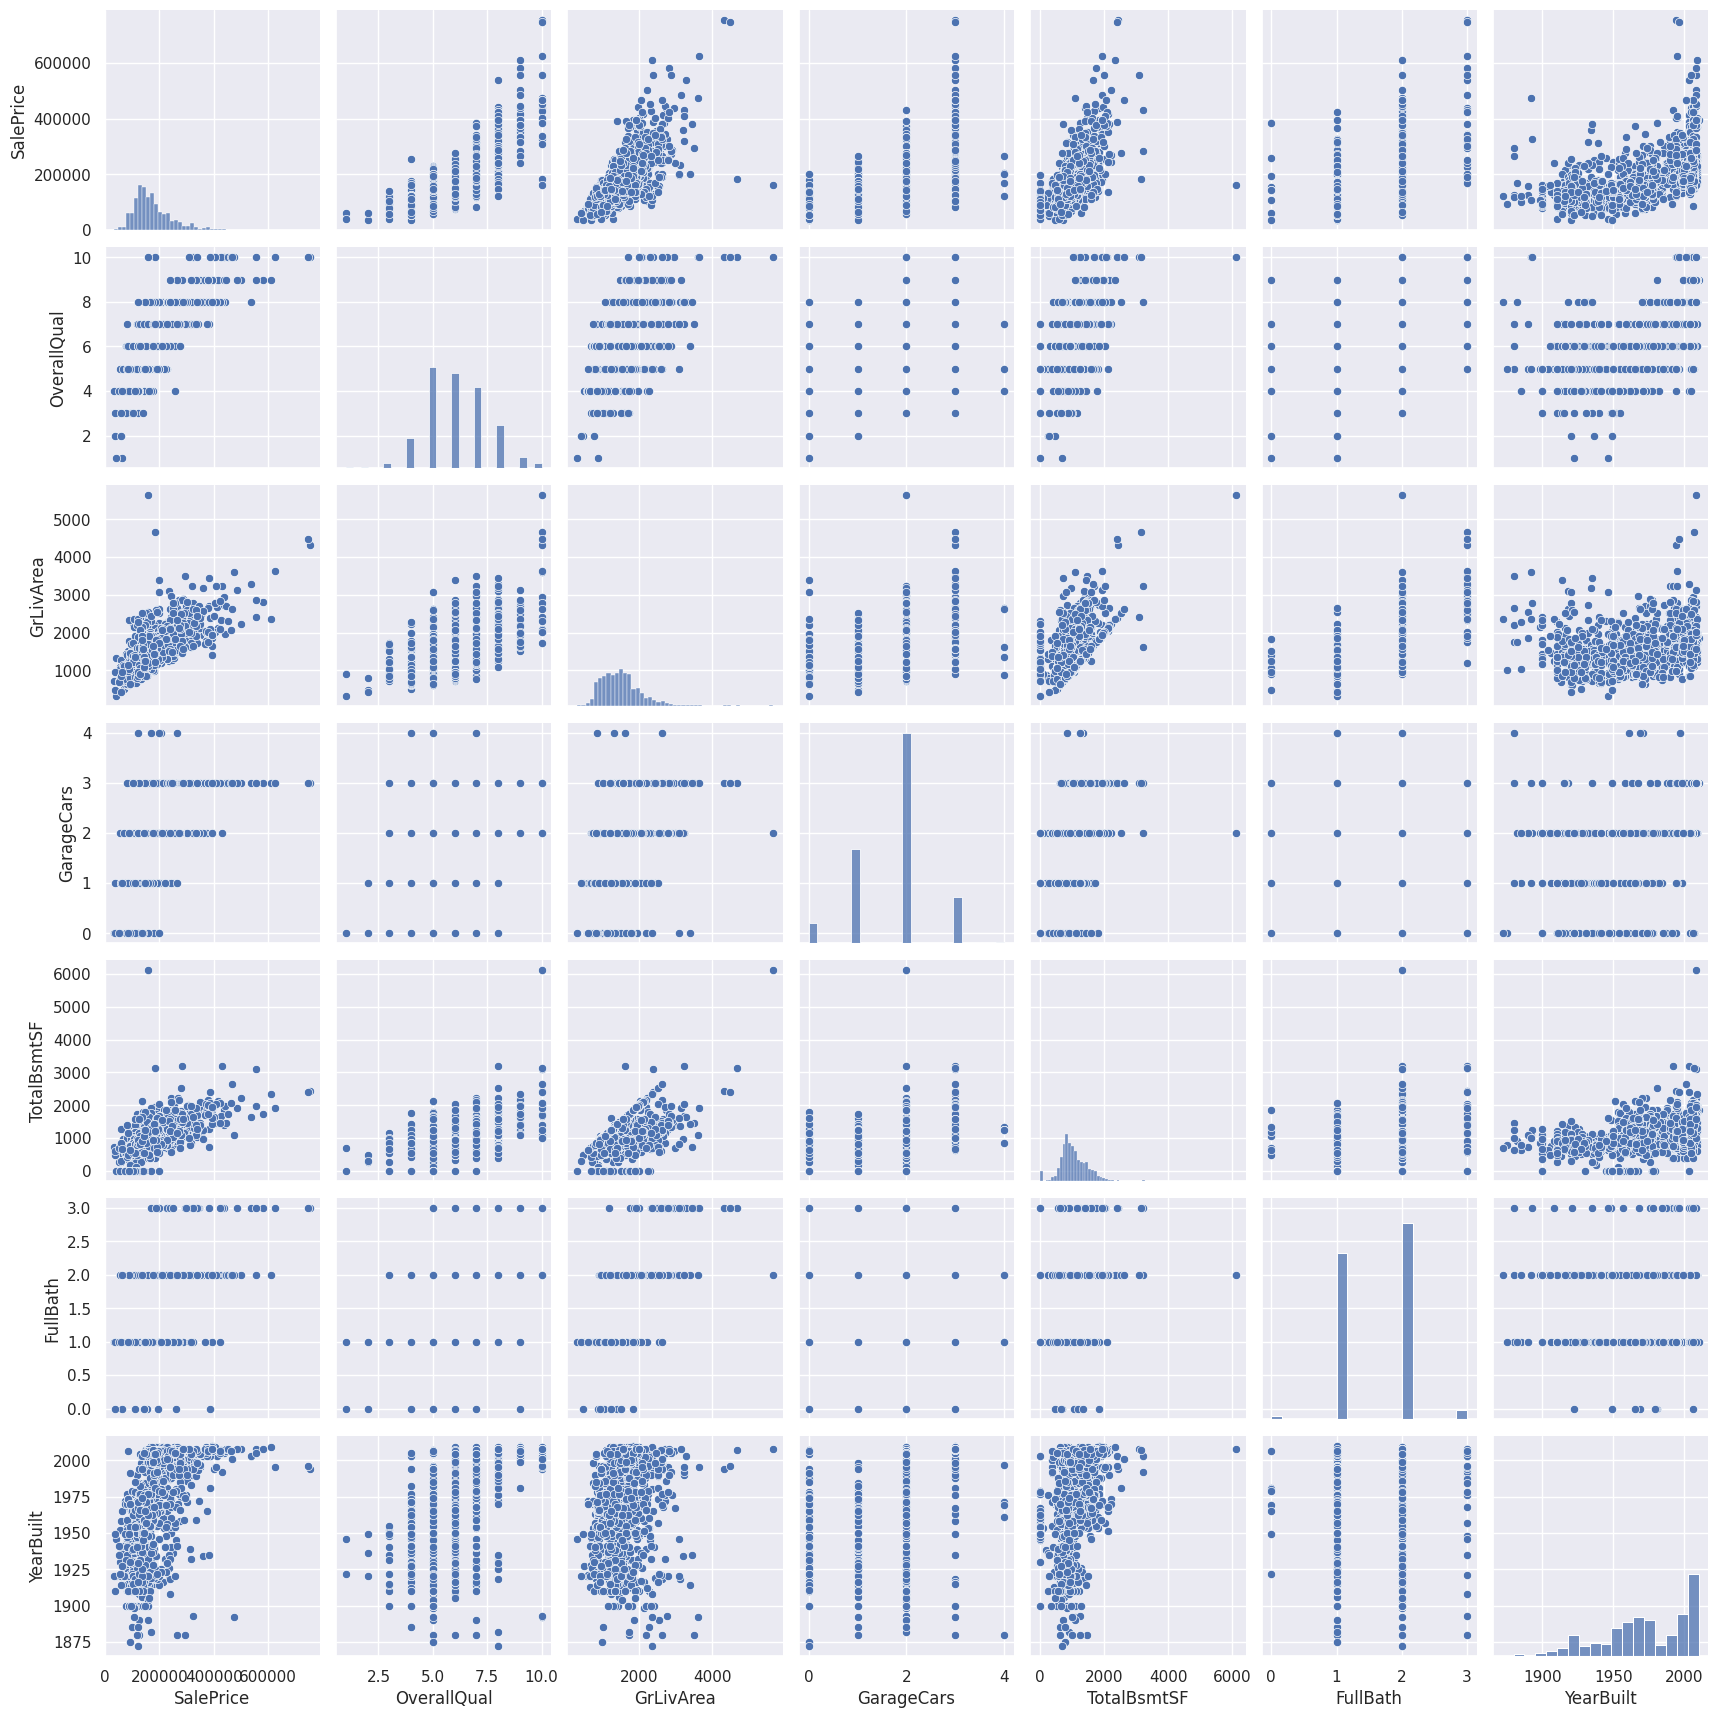

In [32]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [33]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/ train.isnull().count().sort_values(ascending = False))
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,"[:,3f]"
MiscFeature,1406,"[:,3f]"
Alley,1369,"[:,3f]"
Fence,1179,"[:,3f]"
MasVnrType,872,"[:,3f]"
FireplaceQu,690,"[:,3f]"
LotFrontage,259,"[:,3f]"
GarageYrBlt,81,"[:,3f]"
GarageCond,81,"[:,3f]"
GarageType,81,"[:,3f]"


In [34]:
train = train.drop(columns=(missing_data[missing_data['Percent'] > 0.15]).index)

In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

In [36]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

In [37]:
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

In [38]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna(0)

In [39]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna('None')

In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [41]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [42]:
train.Electrical = train['Electrical'].fillna(train['Electrical'].mode()[0])

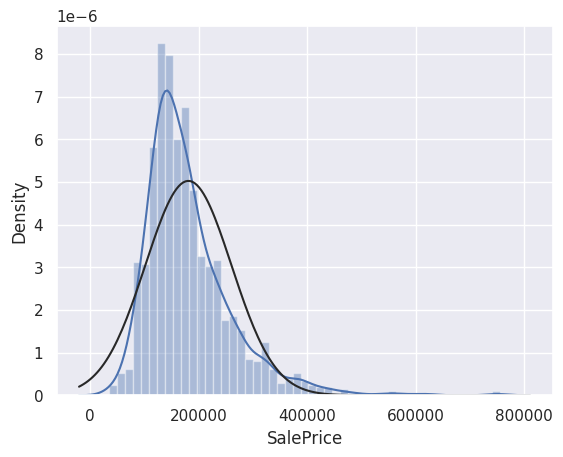

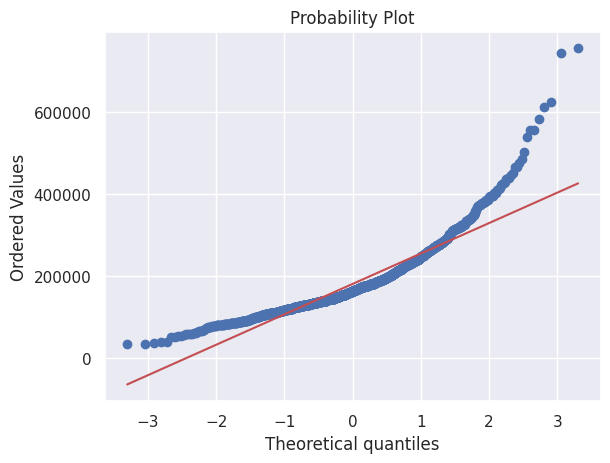

In [43]:
sns.distplot(train['SalePrice'], fit= norm);
fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot = plt)

In [44]:
train['GrLivArea'] = np.log(train['GrLivArea'])
train.loc[train['TotalBsmtSF'] > 0 , 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

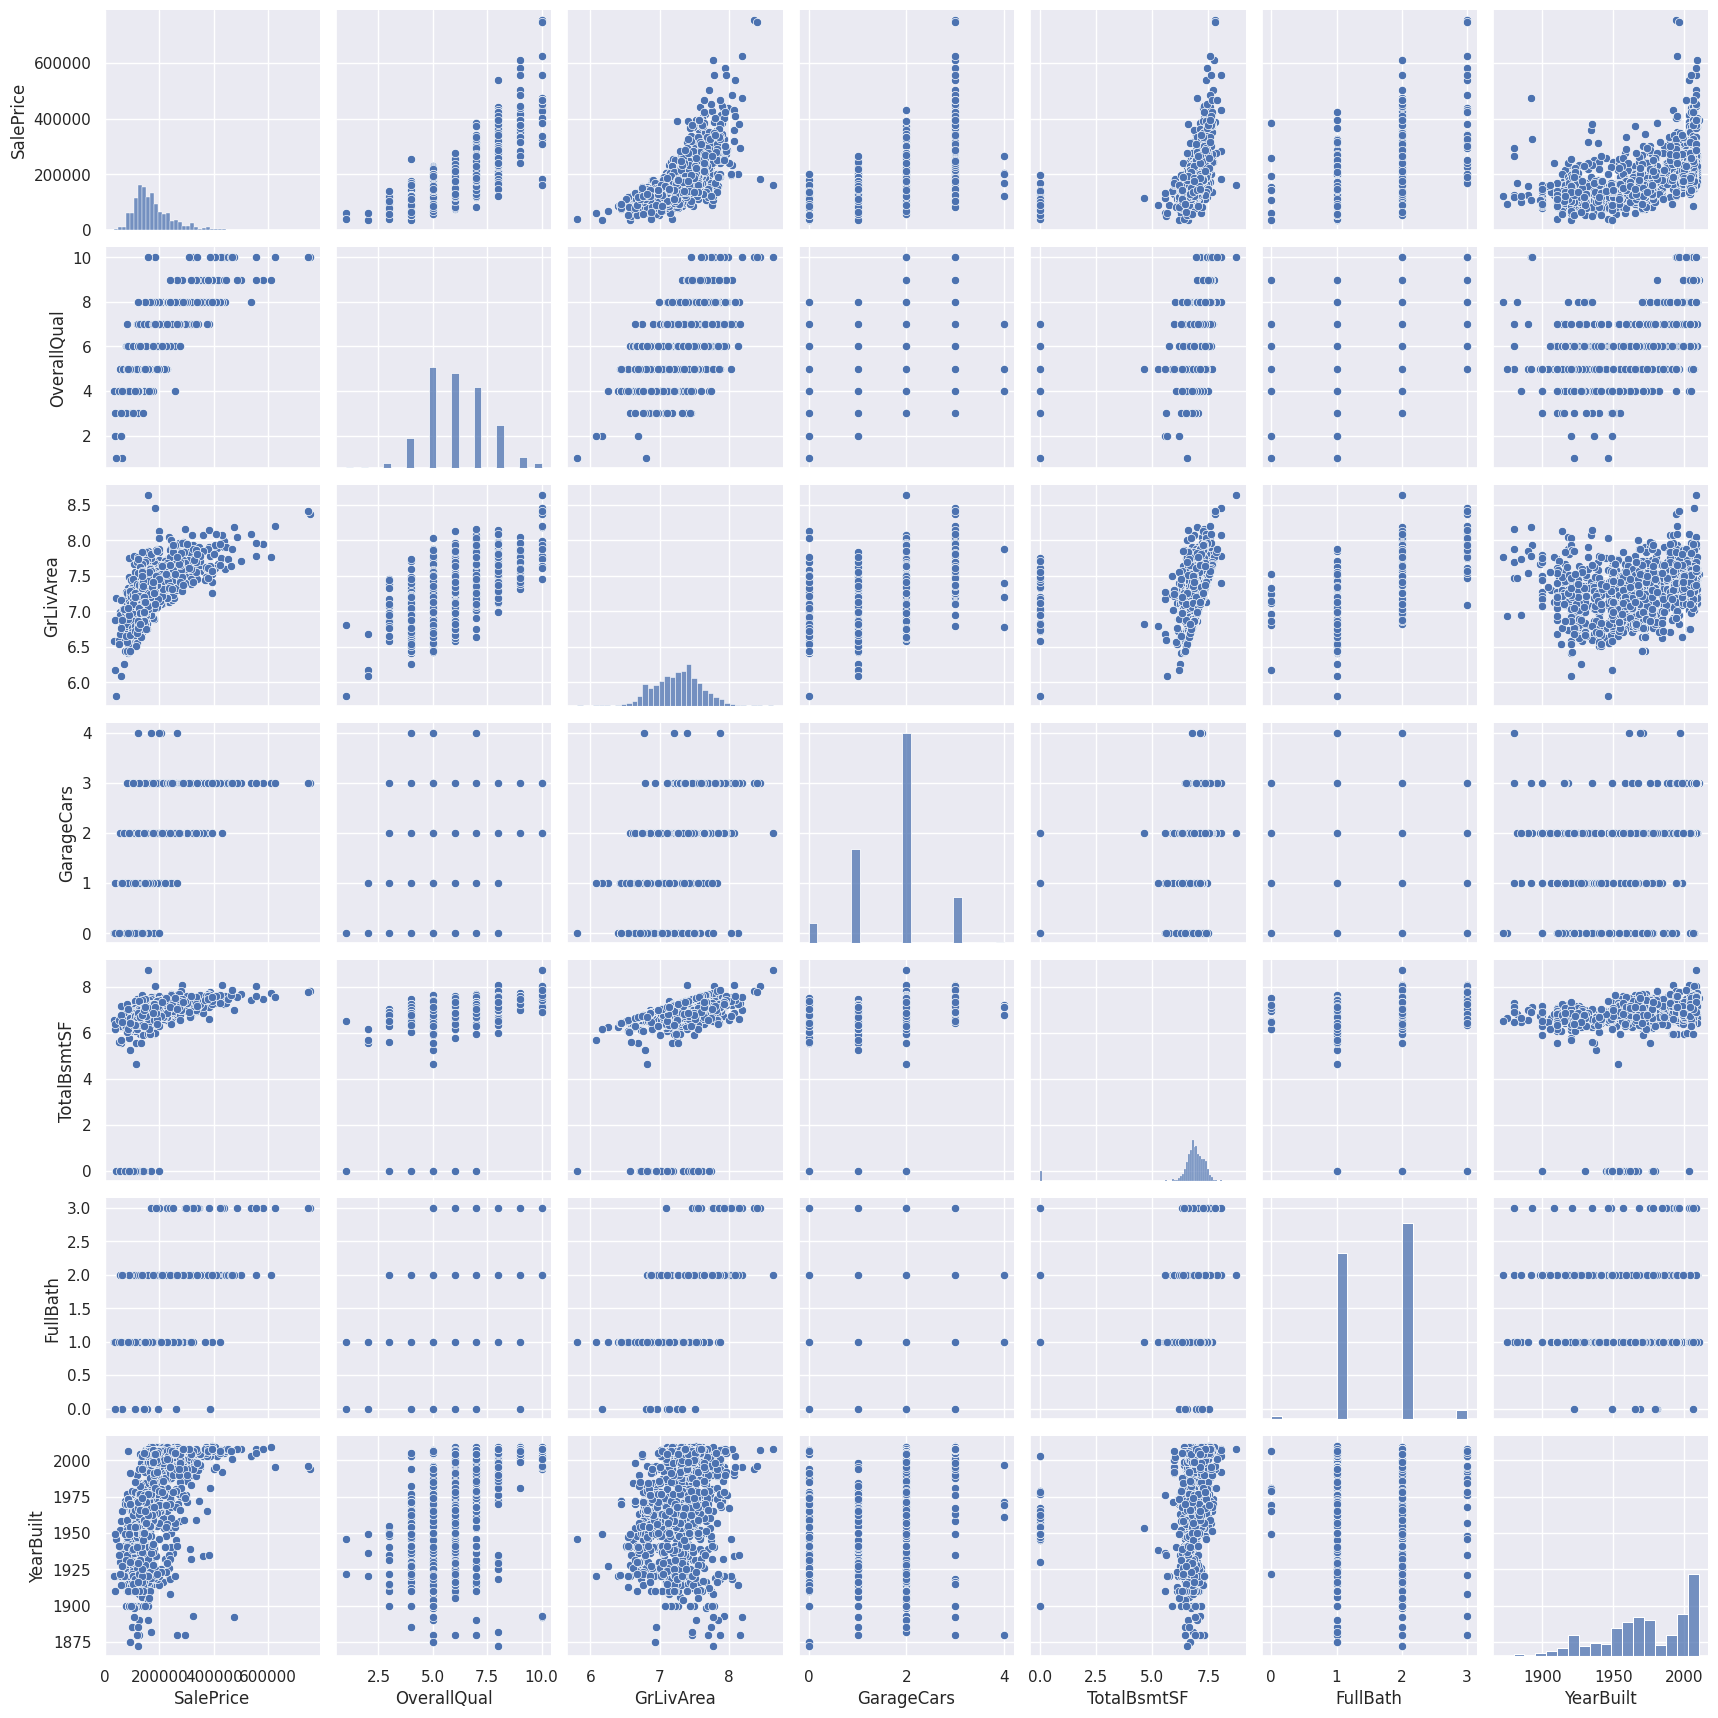

In [45]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [46]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [47]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [48]:
cols = ('ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'Functional', 'LandSlope',
       'LotShape', 'PavedDrive', 'CentralAir','MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

In [49]:
train = pd.get_dummies(train)

In [50]:
train_ID = train['Id']
train.drop('Id', axis = 1, inplace = True)

In [51]:
y_train = train.SalePrice.values
train.drop(['SalePrice'], axis = 1, inplace = True)

In [52]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
n_folds = 5
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)


In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.00004, random_state = 1))

In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.00005, l1_ratio=.9, random_state=3))

In [56]:
KRR = KernelRidge(alpha=1, kernel ='polynomial', gamma =0.4, degree = 1, coef0 =2.5)

In [57]:
GBoost = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.05,
                                 max_depth = 4,  max_features = 'sqrt',
                                 min_samples_leaf= 15, min_samples_split = 10,
                                 loss = 'huber', random_state = 5)

In [58]:
score = rmse_cv(lasso).mean()
print('Lasso score: {}'.format(round(score, 5)))
score = rmse_cv(ENet).mean()
print('ENet score: {}'.format(round(score, 5)))
score = rmse_cv(KRR).mean()
print('KRR score: {}'.format(round(score, 5)))
score = rmse_cv(GBoost).mean()
print('GBoost score: {}'.format(round(score, 5)))

Lasso score: 34921.98954
ENet score: 35430.94554
KRR score: 31642.90774
GBoost score: 27191.21385


In [59]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  # Correct clone usage
        for model in self.models_:
                model.fit(X, y)
        return self

    def predict(self,X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis =1)

In [60]:
average_models = AveragingModels(models = (ENet, lasso, KRR, GBoost))

score = rmse_cv(average_models).mean()
print('Averaged score: {}'.format(round(score, 5)))

Averaged score: 30301.97041
